## **Data Crawling and Scripting of PORK Data Using Fast AI -Kushal Shah**

# New Section

In [ ]:
#Mounted a Google Drive by API to access data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Relevant fast AI libraries
from fastai import *
from fastai.vision import *
import numpy as np
from fastai.vision import *
from fastai.widgets import *
import os

In [ ]:
path = Path('/content/drive/My Drive/fellowshipai-data/final_3_class_data_train_test_split')


## **View Data**

In [ ]:
#bs =32

In [ ]:
ps = 0.5

In [ ]:

##Usiing ImageDataBunch Library i am spliting the Data into Train and Test
#np.random.seed(70)d
def get_data(sz):
  #tms= get_transforms(do_flip=True, flip_vert=True, max_rotate=25.0, max_zoom=1.5, max_lighting=0.6, max_warp=0.6, p_affine=0.75, p_lighting=0.75,xtra_tfms=tfms) 
  return ImageDataBunch.from_folder(path, train="train", valid = 'valid',seed = 42,
                                    ds_tfms=get_transforms(),size=sz, num_workers=4).normalize(imagenet_stats)

In [ ]:
data = get_data(128)


In [ ]:
data

ImageDataBunch;

Train: LabelList (2295 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
raw,raw,raw,raw,raw
Path: /content/drive/My Drive/fellowshipai-data/final_3_class_data_train_test_split;

Valid: LabelList (580 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
raw,raw,raw,raw,raw
Path: /content/drive/My Drive/fellowshipai-data/final_3_class_data_train_test_split;

Test: None

In [ ]:

data.classes

['cooked', 'overcooked', 'raw']

In [ ]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cooked', 'overcooked', 'raw'], 3, 2295, 580)

## **Model Training**

In [ ]:

from fastai.vision.learner import num_features_model,create_body
base_model = models.resnet34
concat_pool = True

body = create_body(models.resnet34, True)
nf = num_features_model(nn.Sequential(*body.children())) * (2 if concat_pool else 1)
nc = 12#num output classes
ps = 0.5
custom_head = create_head(nf,nc,lin_ftrs=[512,256,128,64],ps =[0.5],bn_final=False)
print(custom_head)

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.25, inplace=False)
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): ReLU(inplace=True)
  (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.25, inplace=False)
  (12): Linear(in_features=256, out_features=128, bias=True)
  (13): ReLU(inplace=True)
  (14): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Dropout(p=0.25, inplace=False)
  (16): Linear(in_features=128, out_features=64, bias=True)
  (17): ReLU(inplace=T

In [ ]:

learn = cnn_learner(data,models.resnet34, metrics=[accuracy,Recall(average='macro'),Precision(average='macro'),error_rate,FBeta('micro')],pretrained=True).mixup()

In [ ]:

learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [64, 32, 32]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
ReLU                 [64, 32, 32]         0          False     
___________________________________________________

In [ ]:
learn.fit_one_cycle(2)

In [ ]:
###Progressive Resizing

In [ ]:
learn.save('128_drpn-stg1.2.1.1.1')

In [ ]:
learn.load('128_drpn-stg1.2.1.1.1')

Learner(data=ImageDataBunch;

Train: LabelList (2295 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
raw,raw,raw,raw,raw
Path: /content/drive/My Drive/fellowshipai-data/final_3_class_data_train_test_split;

Valid: LabelList (580 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
raw,raw,raw,raw,raw
Path: /content/drive/My Drive/fellowshipai-data/final_3_class_data_train_test_split;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [ ]:

data = get_data(224)

In [ ]:

learn.data =  data

In [ ]:
learn.unfreeze()

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


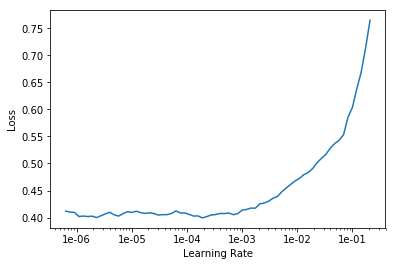

In [ ]:
learn.recorder.plot(suggession=True)

In [ ]:
learn.fit_one_cycle(2,max_lr=slice(1e-05,1e-02))

In [ ]:
learn.save('new_model_prg_size_drpn-stg1.2.1.3.3')

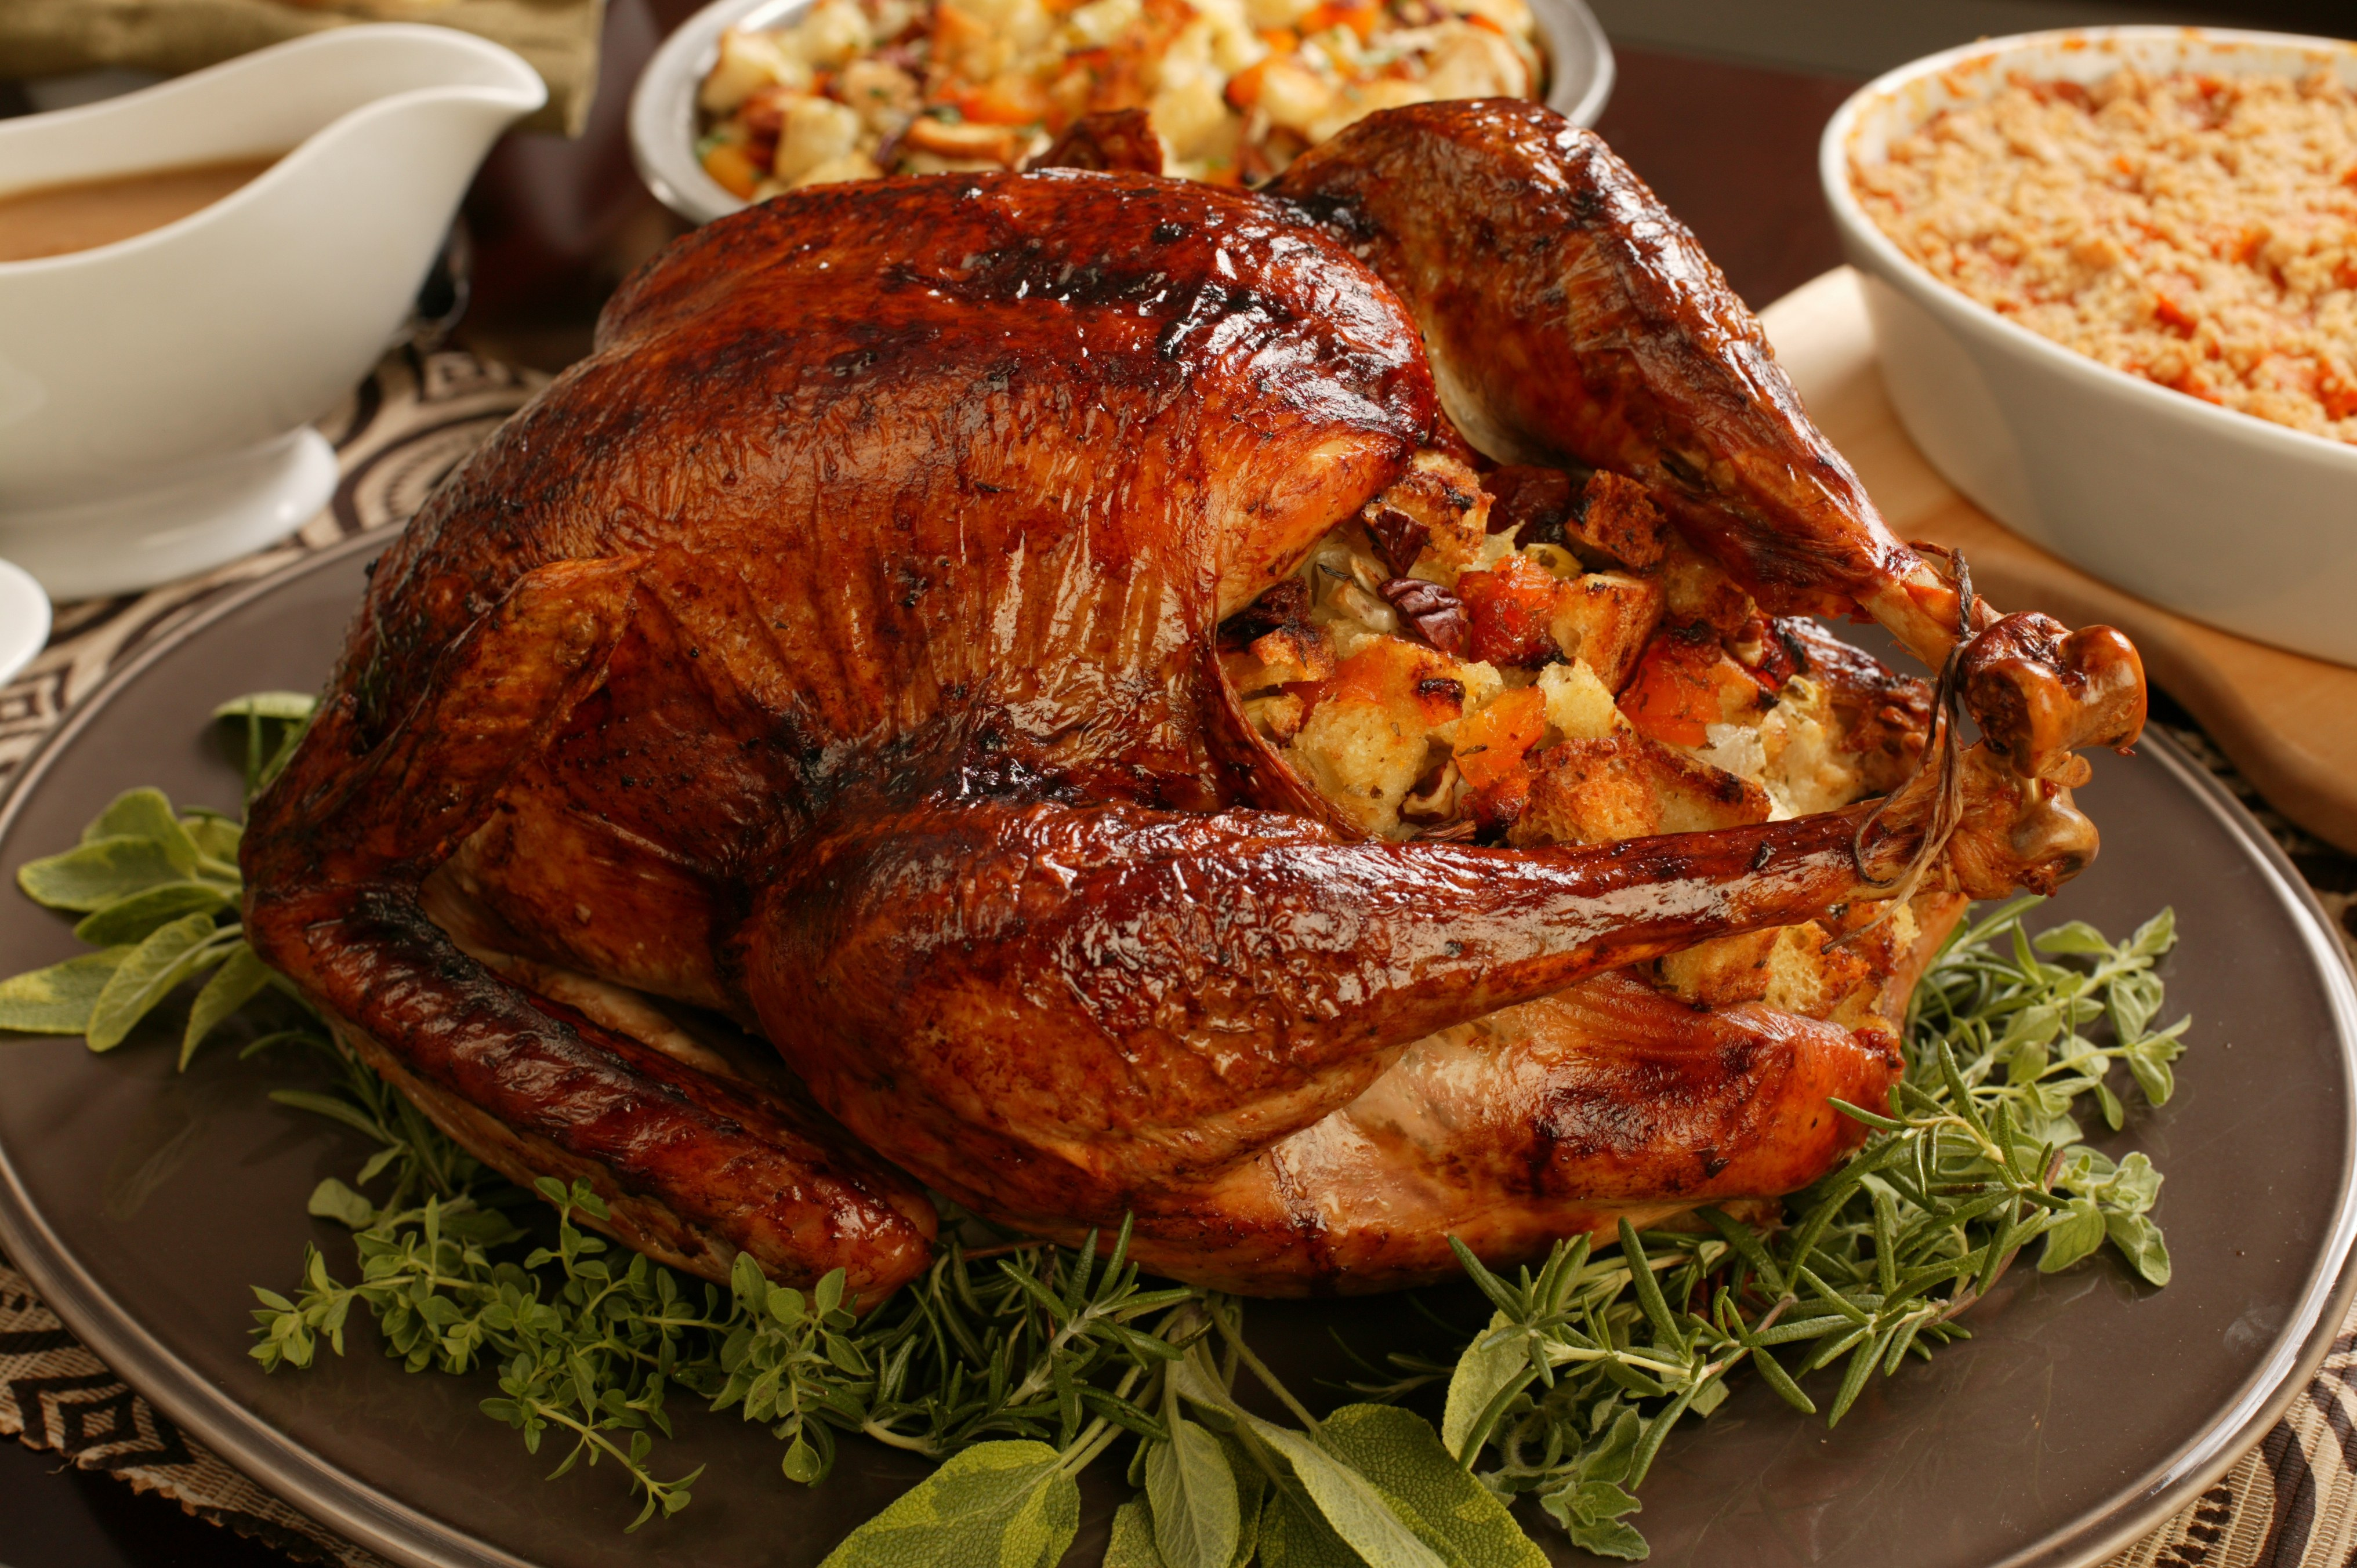

(Category cooked, tensor(0), tensor([0.9594, 0.0331, 0.0075]))


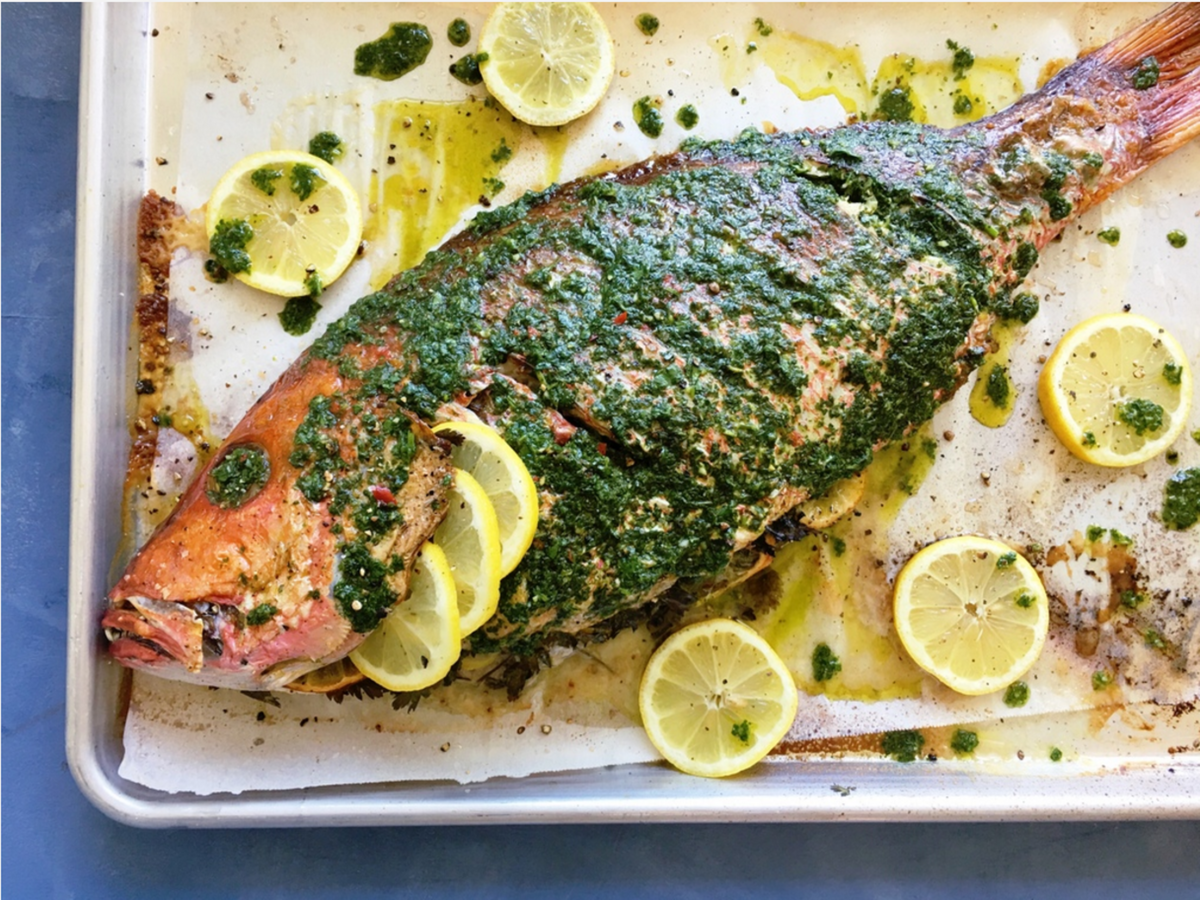

(Category overcooked, tensor(1), tensor([0.3478, 0.6388, 0.0134]))


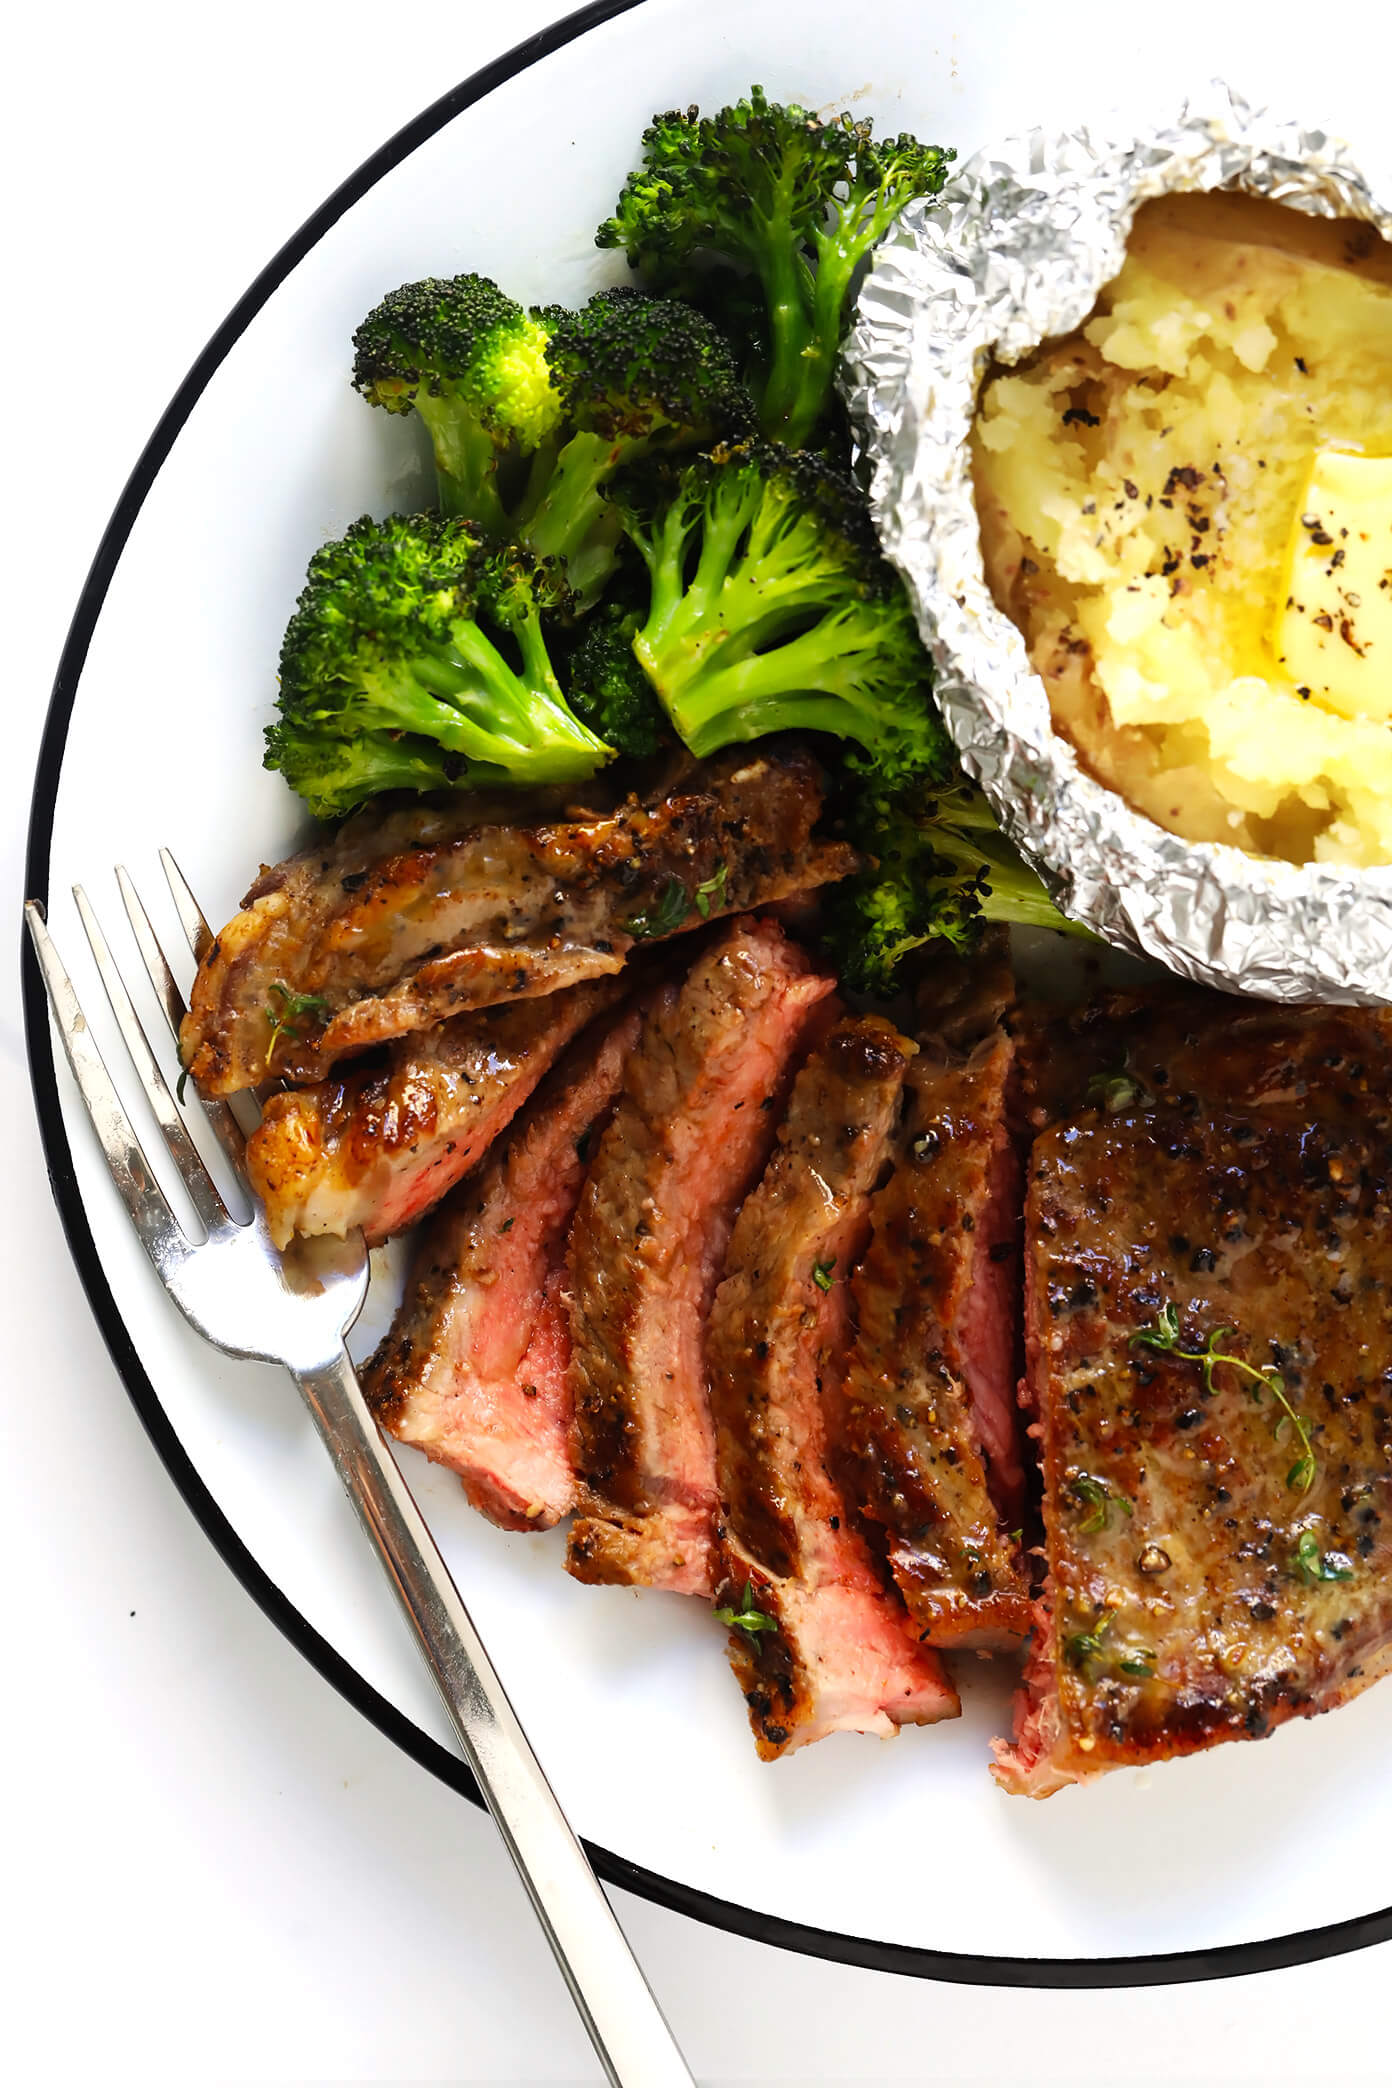

(Category cooked, tensor(0), tensor([0.8750, 0.1187, 0.0062]))


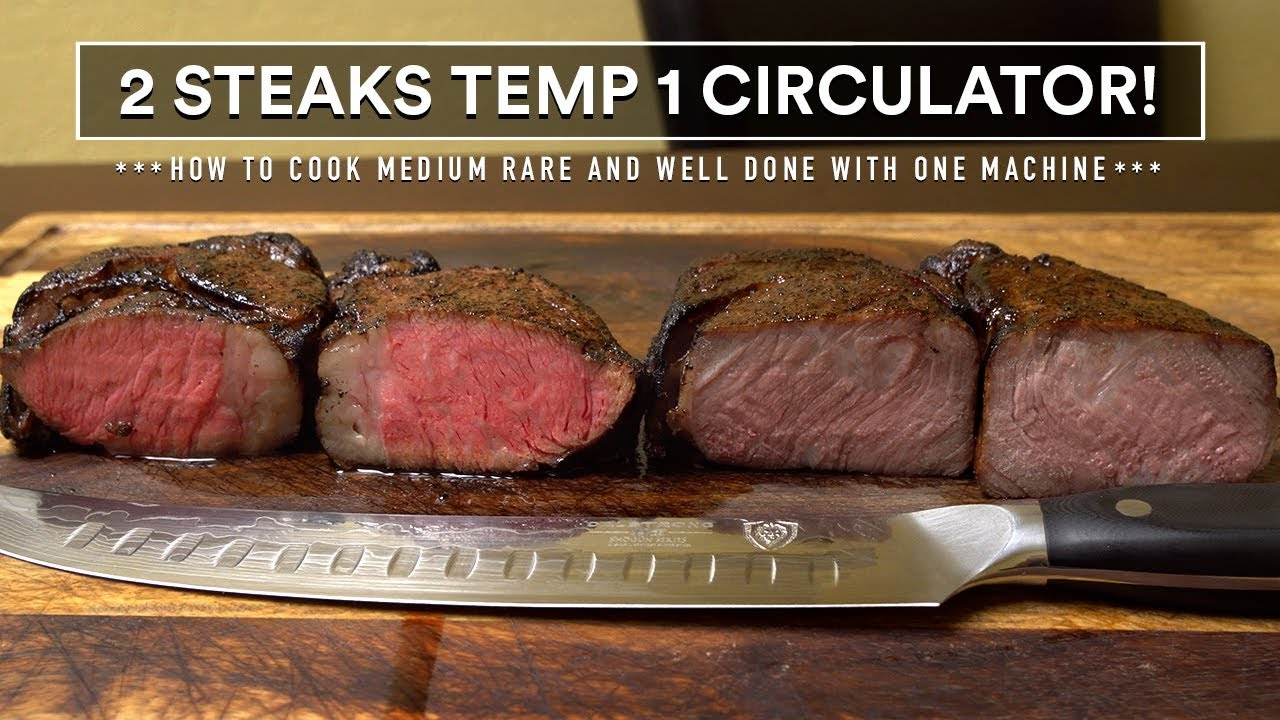

(Category cooked, tensor(0), tensor([0.9065, 0.0266, 0.0669]))


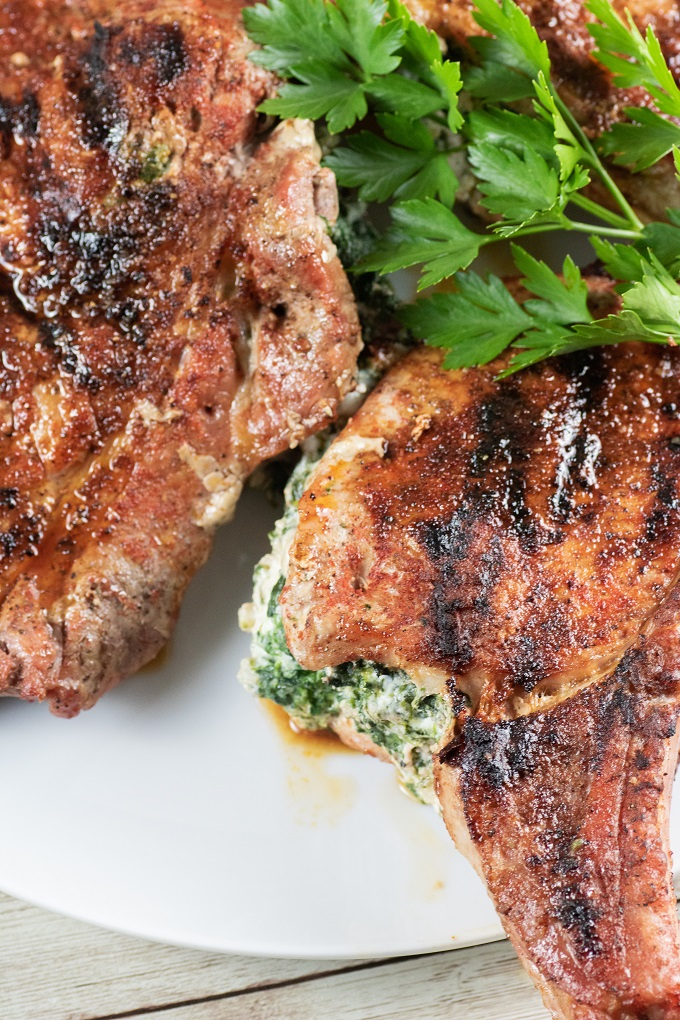

(Category overcooked, tensor(1), tensor([0.2235, 0.7588, 0.0177]))


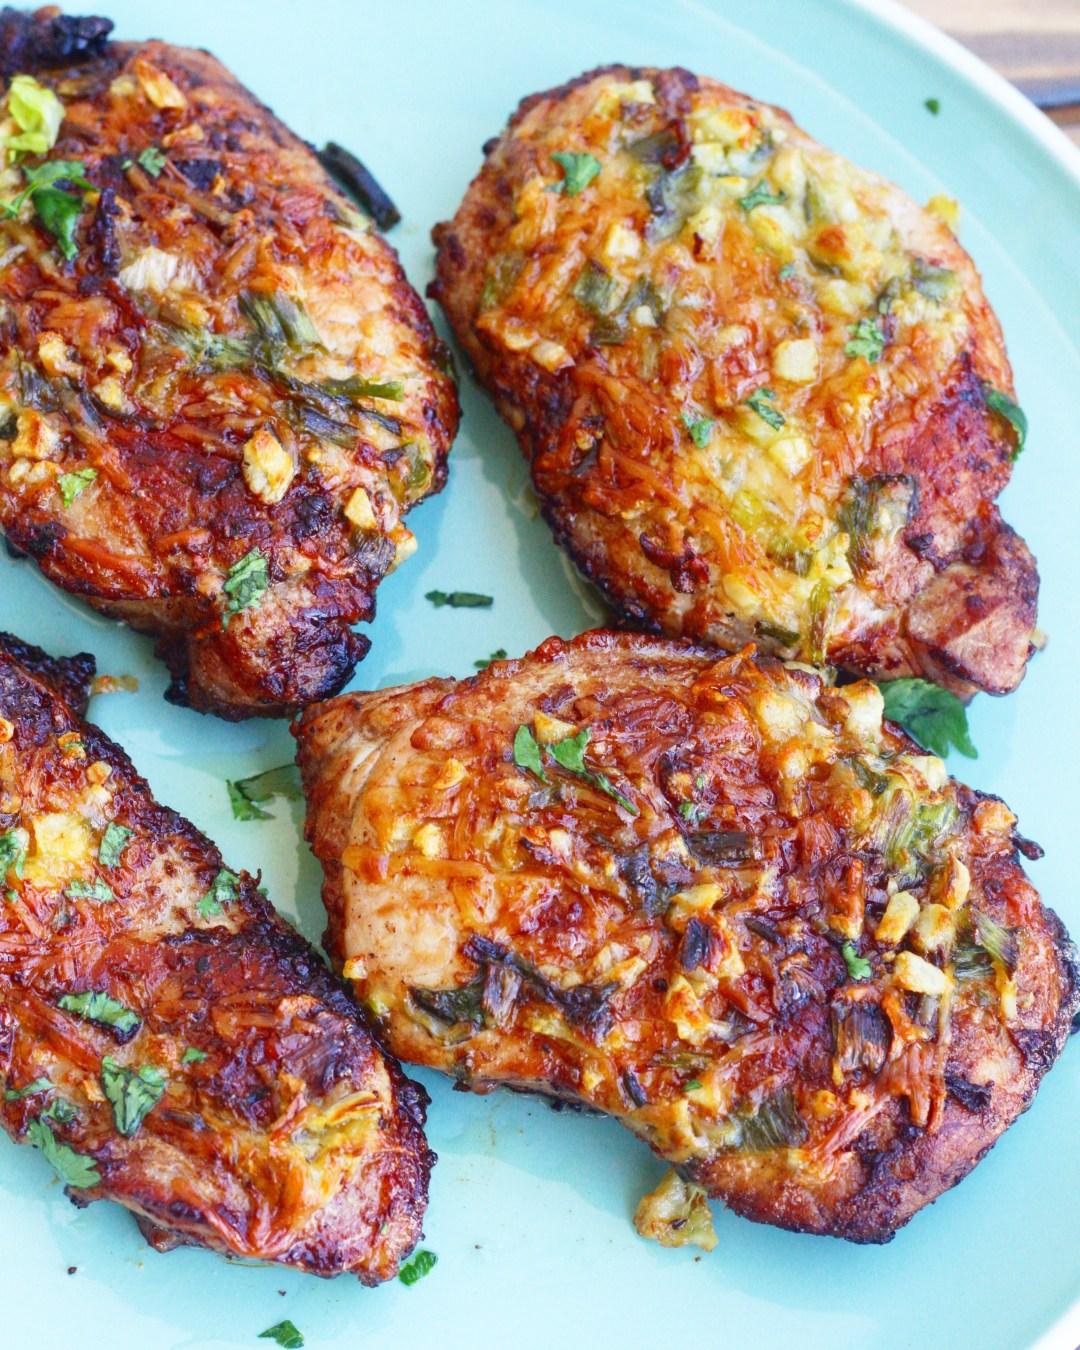

(Category cooked, tensor(0), tensor([0.8077, 0.1387, 0.0536]))


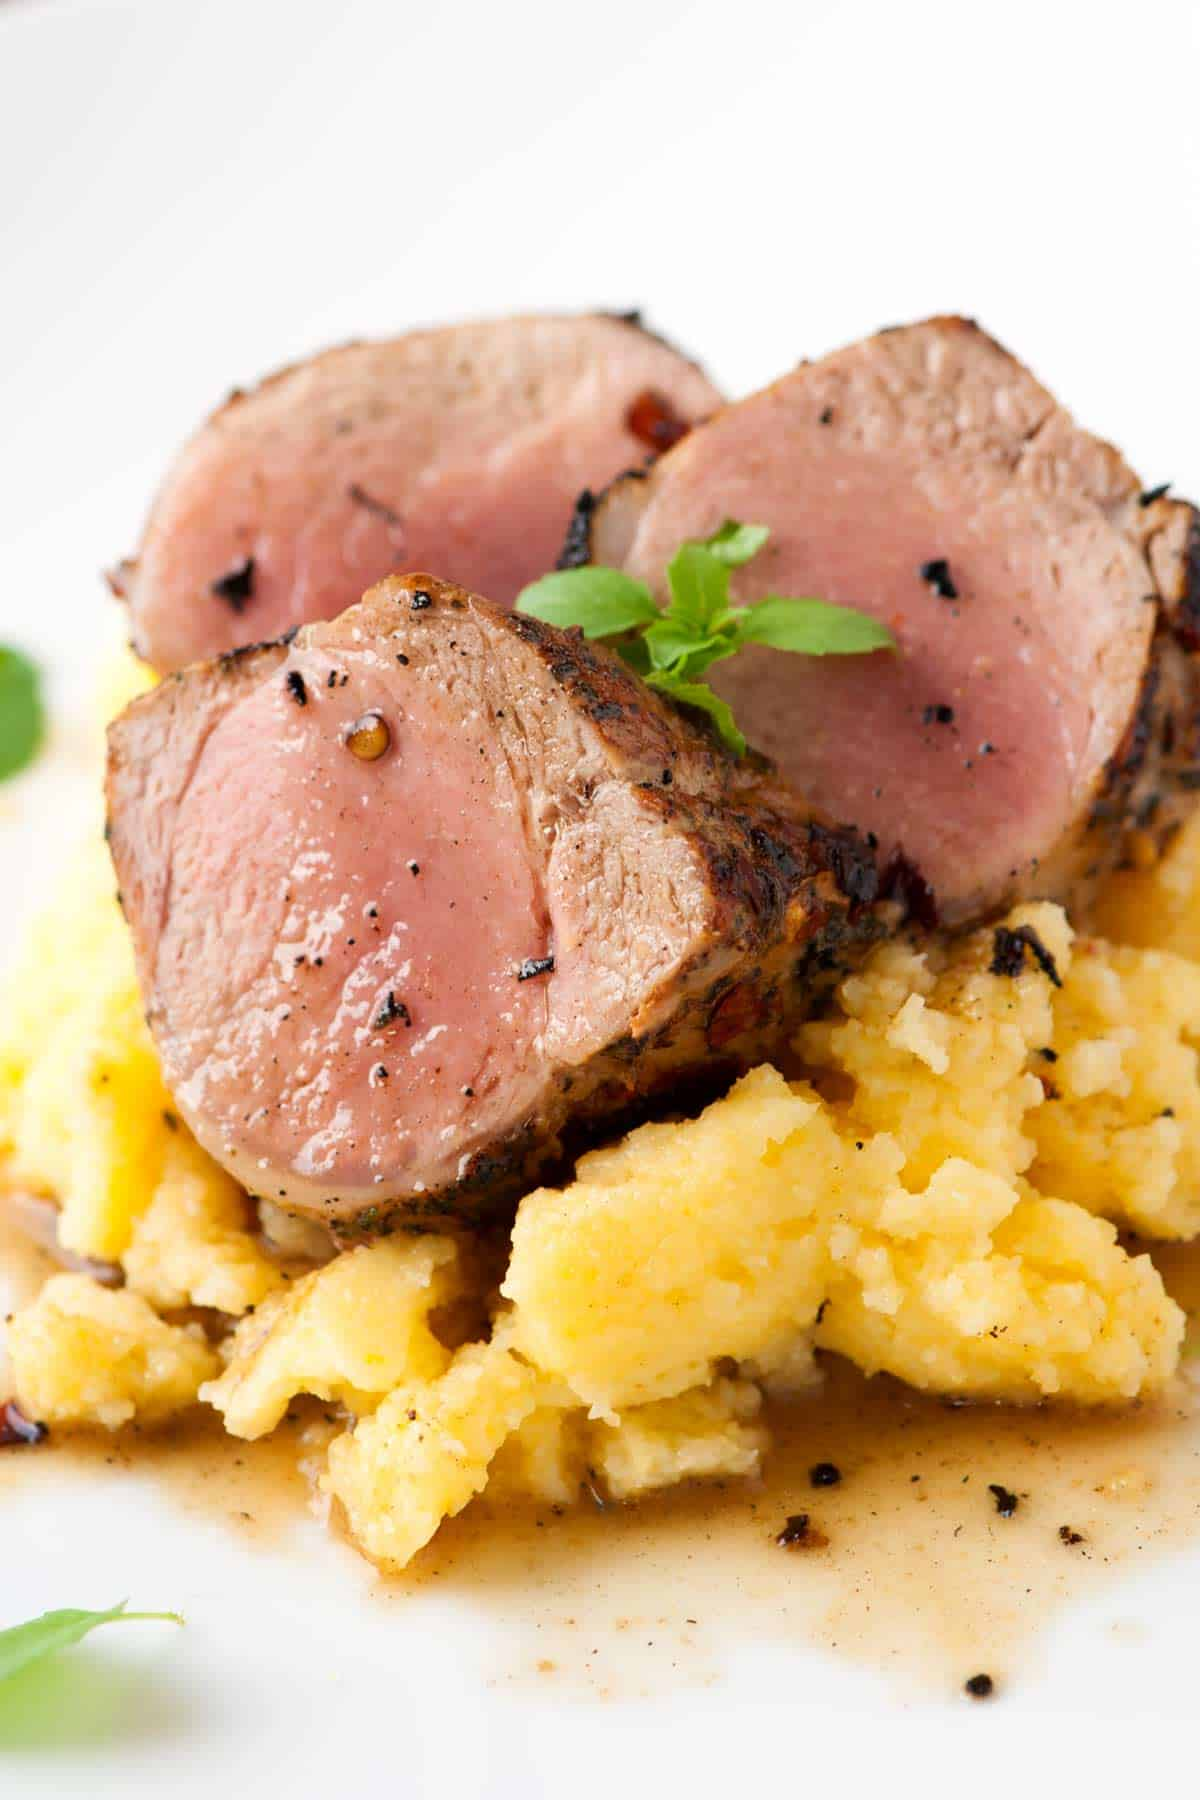

(Category cooked, tensor(0), tensor([0.9734, 0.0074, 0.0192]))


In [ ]:
from IPython.display import Image
test_dir = '/content/drive/My Drive/fellowshipai-data/finaltestimages/'
for img_path in os.listdir(test_dir): 
  img = Image(test_dir+img_path, width = 100, height=100)
  display(img)
  print(learn.predict(open_image(test_dir+img_path)))

In [ ]:
from fastai.tabular import *
from fastai.vision import *

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_multi_top_losses(13,heatmap = True)

TypeError: ignored

In [ ]:
learn.data = data

In [ ]:
data = get_data(224)

In [ ]:
learn.predict(data.valid_ds.x[2])[0]

Category raw

In [ ]:
pred = []
for i in range(len(data.valid_ds)):
  pred.append(str(learn.predict(data.valid_ds.x[i])[0]))


In [ ]:
unpredict =[]
for i in range(len(data.valid_ds)):
  if (pred[i] == valid[i]):
    pass
  else:
    print(pred[i]+' '+valid[i])
    unpredict.append(i)
print(len(unpredict))


  

cooked raw
cooked raw
overcooked cooked
overcooked cooked
raw cooked
overcooked cooked
raw cooked
overcooked cooked
cooked overcooked
cooked overcooked
cooked overcooked
cooked overcooked
cooked overcooked
cooked overcooked
cooked overcooked
15
580


In [ ]:
valid = []
for i in range(len(data.valid_ds)):
  valid.append(str(data.valid_ds.y[i]))

In [ ]:
print(valid)

['raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw', 'raw'

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
x= interp.confusion_matrix()

In [ ]:
print(x)

[[218   6   3]
 [  3 111   1]
 [  3   0 235]]


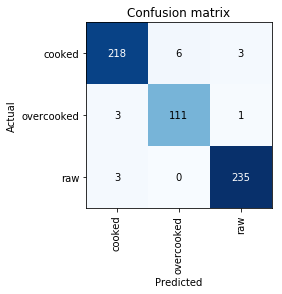

In [ ]:
interp.plot_confusion_matrix()


In [ ]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn
def get_new_fig(fn, figsize=[12,12]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.40, 0.50, 0.37, 2.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[12,12], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(data.classes, rotation = 45, fontsize = 10)
    ax.set_yticklabels(data.classes, rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()


    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; 
    text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 16;
    figsize=[12,12];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


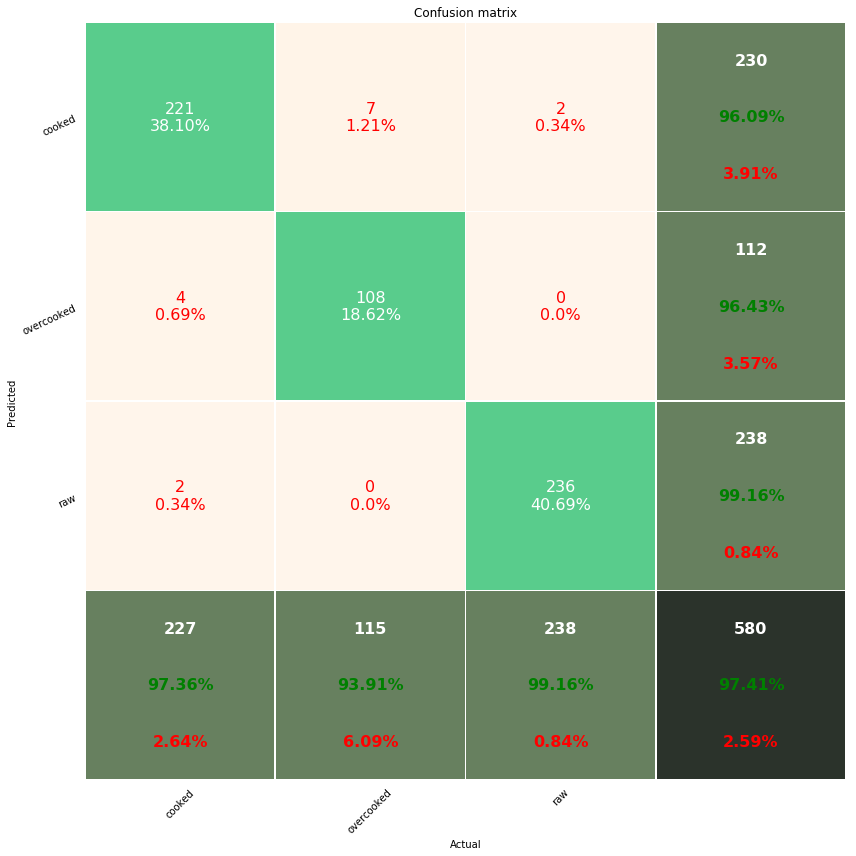

In [ ]:
plot_confusion_matrix_from_data(valid,pred)

In [ ]:

x = learn.predict((data.train_ds[190][0]))

In [ ]:
(x[2])

In [ ]:

img = learn.data.valid_ds[][0]
learn.predict(img)

In [ ]:
interp.top_losses(9)

In [ ]:
from fastai.vision.learner import num_features_model,create_body
base_model = models.resnet34
concat_pool = True

body = create_body(models., True)
nf = num_features_model(nn.Sequential(*body.children())) * (2 if concat_pool else 1)
nc = 12#num output classes
custom_head = create_head(nf,nc,lin_ftrs=[256])
print(custom_head)

In [ ]:
data.show_batch(rows=10, figsize=(10,8))

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
# interp.plot_top_losses(9)
interp.plot_multi_top_losses(9)


## ***Interpretation Of Data***

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

## **Cleaning Data**

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
learn= cnn_learner(db, models.resnet18, metrics=error_rate)

learn.load('mymodel');


In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [ ]:
ImageCleaner(ds, idxs, path)

In [ ]:
if not os.path.isdir('/content/drive/My Drive/fellowshipai-data/darpan/doneness/cleaned raw')  and not os.path.isdir('/content/drive/My Drive/fellowshipai-data/darpan/doneness/burnt'):

    def copytree(src, dst, symlinks = False, ignore = None):
        if not os.path.exists(dst):
            os.makedirs(dst)
            shutil.copystat(src, dst)
        lst = os.listdir(src)
        if ignore:
            excl = ignore(src, lst)
            lst = [x for x in lst if x not in excl]
        for item in lst:
            s = os.path.join(src, item)
            d = os.path.join(dst, item)
            if symlinks and os.path.islink(s):
                if os.path.lexists(d):
                    os.remove(d)
                os.symlink(os.readlink(s), d)
                try:
                    st = os.lstat(s)
                    mode = stat.S_IMODE(st.st_mode)
                    os.lchmod(d, mode)
                except:
                    pass # lchmod not available
            elif os.path.isdir(s):
                copytree(s, d, symlinks, ignore)
            else:
                shutil.copy2(s, d)

    def generate_dir_file_map(path):
        dir_files = defaultdict(list)
        with open(path, 'r') as txt:
            files = [l.strip() for l in txt.readlines()]
            for f in files:
                dir_name, id = f.split('/')
                dir_files[dir_name].append(id + '.jpg')
        return dir_files

    raw_dir_files = generate_dir_file_map('/content/drive/My Drive/fellowshipai-data/darpan/doneness/Raw.txt')
    cooked_dir_files = generate_dir_file_map('/content/drive/My Drive/fellowshipai-data/darpan/doneness/cooked.txt')
    overcooked_dir_files = generate_dir_file_map('/content/drive/My Drive/fellowshipai-data/darpan/doneness/overcooked.txt')


    def ignore_train(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = raw_dir_files[subdir]
        return to_ignore

    def ignore_test(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = cooked_dir_files[subdir]
        return to_ignore
    
    def ignore_test1(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = overcooked_dir_files[subdir]
        return to_ignore
     

    copytree('/content/drive/My Drive/fellowshipai-data/darpan/doneness/raw', '/content/drive/My Drive/fellowshipai-data/darpan/doneness/cleaned raw', ignore=ignore_train)
    copytree('/content/drive/My Drive/fellowshipai-data/darpan/doneness/cooked', '/content/drive/My Drive/fellowshipai-data/darpan/doneness/cleaned cooked', ignore=ignore_test)
    copytree('/content/drive/My Drive/fellowshipai-data/darpan/doneness/overcooked', '/content/drive/My Drive/fellowshipai-data/darpan/doneness/cleanedcooked', ignore=ignore_test1)
    
else:
    print('Train/Test files already copied into separate folders.')

After cleaning the data in kaggle it will generated cleaned.csv file .From cleaned.csv i separated three classes and make a directory of each classes.
